In [74]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


In [32]:
raw_data = pd.read_csv('epi_r.csv')

In [72]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,high_review
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [33]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [34]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

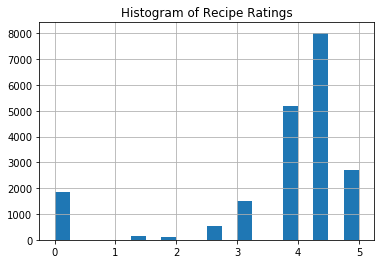

In [35]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [36]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [27]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,high_review
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [37]:
#class PreProcessing(BaseEstimator, TransformerMixin):
class PreProcessing():
    def __init__(self):
        pass

    def fit(self, df, y=None, **fit_params):
        return self

    def transform(self, df):
        df['high_review'] = (df['rating'] >= 4)
        return df.as_matrix()


In [116]:
#transform, scale, pca, regressor - KNN

transformer = PreProcessing()
scaler =  StandardScaler()
feature_selector = SelectFromModel(LinearSVC(loss='squared_hinge', penalty='l1', dual=False))
sklearn_pca = PCA(n_components=25)
classifier =  LinearSVC()


pipe = Pipeline([
    #('transform', transformer),
    ('scale', scaler),
    ('feature_selection', feature_selector),
    ('pca', sklearn_pca),
    ('classify', classifier)
])

In [117]:
#for debugging
#x = pd.DataFrame(pipe.fit_transform(X))
raw_data['high_review'] = (raw_data['rating'] >= 4)

X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium','high_review'], 1)
Y = raw_data.high_review

In [118]:
#Fit the pipeline
pipe.fit(X, Y)
#print(r2_score(Y,pipe.predict(X)))
cross_val_score(pipe, X, Y, cv=10)

array([0.57477567, 0.56181456, 0.56281157, 0.58773679, 0.58254364,
       0.59102244, 0.58852868, 0.57206983, 0.59231537, 0.5748503 ])

In [86]:
sum(Y)/len(Y)

0.5355076800319171

In [107]:
feature_selector.get_support()
z = X.columns[feature_selector.get_support()]

In [109]:
list(z)

['#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broccoli',
 'broccoli rabe',
 'broil',
 'brooklyn',
 'brown rice',
 

In [90]:
feature_selector.estimator_.coef_

array([[-1.15069652e-02,  7.72284186e-03,  2.22258634e-02,
        -1.99523108e-02, -1.66820696e-03, -1.18698191e-02,
        -1.68925615e-03, -1.09551223e-02, -1.97647849e-03,
         2.60949099e-02,  1.05962597e-02,  4.59468728e-03,
        -7.69171702e-03, -9.59955390e-03, -6.35663721e-03,
        -2.11505889e-02,  1.55239959e-03,  0.00000000e+00,
        -6.83188161e-04,  2.62047232e-03,  3.94568122e-03,
        -1.30850822e-02,  1.47597478e-02, -1.12843370e-02,
         1.46167007e-02,  8.51286902e-03,  9.77831804e-03,
         8.01844376e-03,  9.51336306e-04,  9.91340439e-04,
         2.19052197e-02,  1.48931829e-02,  7.55028378e-04,
        -1.77425040e-02,  5.93678692e-03,  3.00431273e-03,
         1.05810115e-02,  5.58152139e-03,  6.28224305e-03,
         4.42899704e-03,  1.47358386e-02,  5.02425125e-03,
         1.06720969e-02, -8.01607977e-03,  5.22837959e-03,
        -1.27043773e-02,  1.16542369e-02,  2.66679255e-03,
        -2.44252986e-03,  3.77598449e-03, -6.35086497e-0

In [91]:
cols = X.columns

In [93]:
coeffs = feature_selector.estimator_.coef_

In [106]:
len(coeffs[0])

674

In [97]:
coeffs

array([[-1.15069652e-02,  7.72284186e-03,  2.22258634e-02,
        -1.99523108e-02, -1.66820696e-03, -1.18698191e-02,
        -1.68925615e-03, -1.09551223e-02, -1.97647849e-03,
         2.60949099e-02,  1.05962597e-02,  4.59468728e-03,
        -7.69171702e-03, -9.59955390e-03, -6.35663721e-03,
        -2.11505889e-02,  1.55239959e-03,  0.00000000e+00,
        -6.83188161e-04,  2.62047232e-03,  3.94568122e-03,
        -1.30850822e-02,  1.47597478e-02, -1.12843370e-02,
         1.46167007e-02,  8.51286902e-03,  9.77831804e-03,
         8.01844376e-03,  9.51336306e-04,  9.91340439e-04,
         2.19052197e-02,  1.48931829e-02,  7.55028378e-04,
        -1.77425040e-02,  5.93678692e-03,  3.00431273e-03,
         1.05810115e-02,  5.58152139e-03,  6.28224305e-03,
         4.42899704e-03,  1.47358386e-02,  5.02425125e-03,
         1.06720969e-02, -8.01607977e-03,  5.22837959e-03,
        -1.27043773e-02,  1.16542369e-02,  2.66679255e-03,
        -2.44252986e-03,  3.77598449e-03, -6.35086497e-0

In [102]:
list(sorted(zip(coeffs[0],cols)))



[(-0.05495001193276182, 'low fat'),
 (-0.05070432598632909, 'pasta'),
 (-0.03663805163053411, 'leftovers'),
 (-0.03546725713542797, 'house & garden'),
 (-0.03363145326342136, 'harpercollins'),
 (-0.030355027989618963, 'pittsburgh'),
 (-0.02958339450827302, 'yogurt'),
 (-0.027483799828498145, 'lancaster'),
 (-0.027149184148733584, 'vegetarian'),
 (-0.026984706981727464, 'drink'),
 (-0.026933461778082996, 'paleo'),
 (-0.026575636983563175, 'radish'),
 (-0.025787601229726988, 'tofu'),
 (-0.02552087880421785, 'stir-fry'),
 (-0.02537110057747798, 'cocktail party'),
 (-0.02527304803304773, 'lasagna'),
 (-0.024833070723277915, 'cornmeal'),
 (-0.024435672874578682, 'dairy free'),
 (-0.02394500883182882, 'cabbage'),
 (-0.02213127107064311, 'wheat/gluten-free'),
 (-0.021150588876125, 'aperitif'),
 (-0.02103062953994488, 'cranberry sauce'),
 (-0.02057354440649393, 'jícama'),
 (-0.02035160778381923, 'zucchini'),
 (-0.020159501491179965, 'low/no sugar'),
 (-0.02006140127378555, 'scotch'),
 (-0.0199